In [1]:
import ast
import pandas as pd
import seaborn as sns 
from datasets import load_dataset
import matplotlib.pyplot as plt 
from matplotlib.ticker import PercentFormatter

# Loading the Dataset 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Initial Clean-up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Countries of interest: UK, France, Netherlands, Germany, Belgium

countries = ['United Kingdom', 'France', 'Netherlands', 'Germany', 'Belgium']

df_eu = df[df['job_country'].isin(countries)]
df_eu['job_country'].unique().tolist()

df_eu['job_title_short'].value_counts().head(8)

job_titles = df_eu['job_title_short'].value_counts().index[:3].tolist()



In [8]:
df_eu['job_title_short'].value_counts()

job_title_short
Data Analyst                 39346
Data Engineer                39282
Data Scientist               31553
Senior Data Engineer          8137
Senior Data Scientist         6205
Business Analyst              4709
Software Engineer             4165
Senior Data Analyst           4091
Machine Learning Engineer     1813
Cloud Engineer                1399
Name: count, dtype: int64

In [4]:
for job in df_eu['job_title_short'].unique():
    if job.startswith('Senior'):
        job_titles.append(job)


job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Senior Data Analyst',
 'Senior Data Scientist',
 'Senior Data Engineer']

In [11]:
df_eu_6 = df_eu[df_eu['job_title_short'].isin(job_titles)]
df_eu_6['job_title_short'].value_counts()

job_title_short
Data Analyst             39346
Data Engineer            39282
Data Scientist           31553
Senior Data Engineer      8137
Senior Data Scientist     6205
Senior Data Analyst       4091
Name: count, dtype: int64

In [19]:
df_eu_6.groupby('job_title_short')['salary_year_avg'].describe()

,count,mean,std,min,25%,50%,75%,max
job_title_short,,,,,,,,
Data Analyst,210.0,91832.654762,37478.777552,30000.0,56700.0,89100.0,111175.0,200000.0
Data Engineer,195.0,117182.774359,35147.116287,35000.0,96773.0,98301.5,147500.0,249000.0
Data Scientist,198.0,111004.762626,41879.876639,33488.5,72900.0,93065.5,157500.0,205000.0
Senior Data Analyst,36.0,103184.263889,19561.941648,49566.5,89100.0,111175.0,111175.0,156500.0
Senior Data Engineer,71.0,132800.654930,29568.735812,45000.0,110886.5,147500.0,147500.0,171620.0
Senior Data Scientist,67.0,134748.895522,36310.601306,56700.0,89885.0,157500.0,157500.0,224500.0


In [17]:
job_order = df_eu_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.tolist()

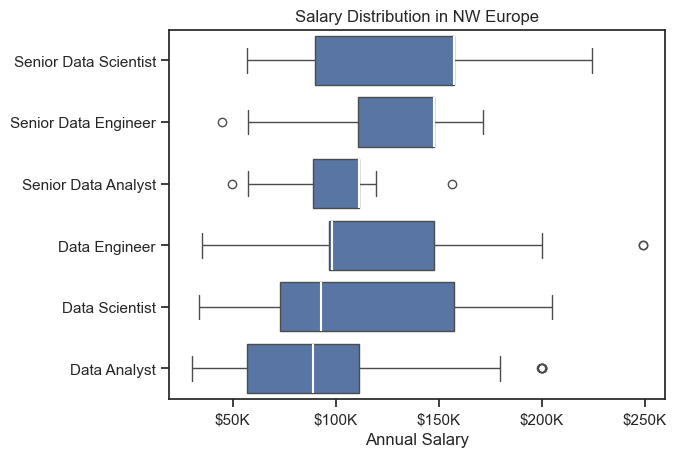

In [23]:
sns.boxplot(data=df_eu_6,
            x='salary_year_avg',
            y='job_title_short',
            order=job_order,
            medianprops=dict(color='white', linewidth=1.5)
            )
sns.set_theme(style='ticks')

plt.title('Salary Distribution in NW Europe')
plt.xlabel('Annual Salary')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


In [27]:
df_eu_da = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].copy()
df_eu_da['job_country'].unique()
df_eu_da['job_title_short'].unique()

array(['Data Analyst'], dtype=object)

In [29]:
df_eu_da = df_eu_da.dropna(subset=['salary_year_avg'])

In [32]:
df_eu_da_exp = df_eu_da.explode('job_skills')
df_eu_da_exp[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
12526,111175.0,power bi
12526,111175.0,sharepoint


In [40]:
df_da_pay = df_eu_da_exp.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

In [41]:
df_da_pay = df_da_pay.head(10)
df_da_pay

,count,median
job_skills,,
tensorflow,1,177283.00
pytorch,1,177283.00
terraform,2,165100.75
nosql,8,165000.00
mongodb,2,165000.00
aurora,1,165000.00
mysql,3,165000.00
postgresql,1,165000.00
kafka,5,163782.00


In [42]:
df_da_count = df_eu_da_exp.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

In [43]:
df_da_count = df_da_count.head(10)
df_da_count

,count,median
job_skills,,
sql,103,98500.0
python,77,98500.0
excel,57,80850.0
tableau,47,98500.0
r,28,89152.0
azure,27,89100.0
power bi,26,89100.0
go,23,57500.0
aws,17,111175.0


In [ ]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')